In [29]:
%pylab inline
import numpy as np
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


In [30]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [31]:
X_train.reshape(-1, 28*28).shape

(60000, 784)

(<matplotlib.image.AxesImage at 0x7f9a8593cd90>, 5)

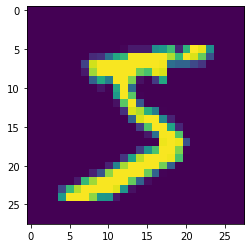

In [32]:
imshow(X_train[0]),Y_train[0]

In [33]:
import torch
import torch.nn as nn
class manish(torch.nn.Module):
  def __init__(self):
    super(manish, self).__init__()
    self.l1 = nn.Linear(784,128)
    self.act = nn.ReLU()
    self.l2 = nn.Linear(128, 10)
  def forward(self, x):
    x = self.l1(x)
    x = self.act(x)
    x = self.l2(x)
    return x

In [34]:
model = manish()
model(torch.tensor(X_train[0:10].reshape((-1,28*28))).float())

tensor([[-13.7441,   2.3354, -18.0730, -13.4197, -15.0360, -36.7536, -12.2479,
         -15.4973,   1.2411,   1.2656],
        [  3.8016,  -1.7202, -18.1389, -11.9072,   3.9995,   2.1479, -23.4010,
           9.7952,   5.6374, -20.6165],
        [  5.3228,   5.8244, -17.3626,   8.1449,  -8.9164,  10.5311, -39.7515,
          26.8780, -19.9909, -20.8914],
        [ -2.8882,   5.4257, -10.4668, -19.0915,   2.7403,   3.0340, -20.7252,
          14.7385, -10.5881,   2.6144],
        [ -0.7168,  45.2131, -22.7049,  14.1793, -20.0480,   3.9450, -40.1926,
           6.0462, -19.9706, -21.5187],
        [ 16.3753,   5.1885, -21.4918,   1.6303,   9.6036, -13.7020, -15.9585,
          22.3414, -10.8418, -24.3221],
        [-27.8559,  30.9120, -17.9421,   7.5800,  -5.7585,  -7.6352, -30.5180,
          18.6725, -20.2886, -27.2636],
        [  5.5493,  16.5949,  18.4159, -36.0671, -18.8707,  -3.0129, -44.7950,
          -3.4555,   6.6061,  -9.2516],
        [-21.3015,  23.8926,  -7.6396,   3.6153,

In [38]:
bs = 32
loss_CE = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters())
losses = []
accuracies = []
for i in (t := trange(1000)):
  samp = np.random.randint(0, X_train.shape[0], size = bs)
  x = torch.tensor(X_train[samp].reshape((-1,28*28))).float()
  y = torch.tensor(Y_train[samp]).long()
  opt.zero_grad()
  out = model(x)
  cat = torch.argmax(out, dim=1)
  accuracy = (cat == y).float().mean()
  loss = loss_CE(out,y)
  loss.backward()
  opt.step()
  loss, accuracy = loss.item(), accuracy.item()
  losses.append(loss)
  accuracies.append(accuracy)
  t.set_description(f"Loss: {loss}, Accuracy: {accuracy}")

Loss: 0.21746297180652618, Accuracy: 0.90625: 100%|██████████| 1000/1000 [00:04<00:00, 201.87it/s]


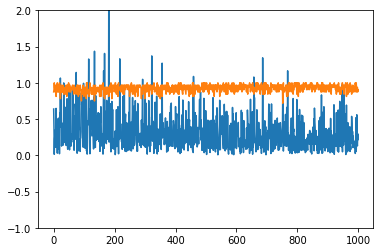

In [39]:
plt.ylim(-1,2)
plot(losses)
plot(accuracies)

In [43]:
Y_test_preds = torch.argmax(model(torch.tensor(X_test.reshape((-1,28*28))).float()), dim = 1).numpy()

In [44]:
(Y_test == Y_test_preds).mean()

0.9278